In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
%matplotlib inline

In [4]:
df00=pd.read_csv(r'C:\Users\ido14\OneDrive\Desktop\שנה א\מדעי הנתונים\מטלות\Final Projact\classification\weatherAUS.csv')

In [5]:
pd.set_option('display.max_columns',None)
df00.head().T

,0,1,2,3,4
Date,2008-12-01,2008-12-02,2008-12-03,2008-12-04,2008-12-05
Location,Albury,Albury,Albury,Albury,Albury
MinTemp,13.4,7.4,12.9,9.2,17.5
MaxTemp,22.9,25.1,25.7,28,32.3
Rainfall,0.6,0,0,0,1
Evaporation,NaN,NaN,NaN,NaN,NaN
Sunshine,NaN,NaN,NaN,NaN,NaN
WindGustDir,W,WNW,WSW,NE,W
WindGustSpeed,44,44,46,24,41
WindDir9am,W,NNW,W,SE,ENE


# Exploring the data

## The mean of the features 
  * Date: The date of observation
  * Location: The common name of the lcoation of the weather station
  * MinTemp: The minimum temperature in degrees 
  * MaxTemp: The maximum temperature in degrees
  * Rainfall: The amount of rainfall recorded for the day in mm
  * Evaporation: The so-called Class A pan evaporation (mm) in the 24 hours to 9am
  * Sunshine: The number of hours of bright sunshine in the day
  * WindGustDir: The direction of the strongest wind gust in the 24 hours to midnight
  * WindGustSpeed: The speed of the strongest wind gust in the 24 hours to midnight
  * WindDir9am: Direction of the wind at 9am
  * WindDir3pm: Direction of the wind at 3pm
  * WindSpeed9am: Wind speed averaged over 10 minutes prior to 9am
  * WindSpeed3pm: Wind speed averaged over 10 minutes prior to 3pm
  * Humidity9am: Humidity percent at 9am
  * Humidity3pm: Humidity percent at 3pm
  * Pressure9am: Atmospheric pressure (hpa) reduced to mean sea level at 9am
  * Pressure3pm: Atmospheric pressure (hpa) reduced to mean sea level at 3pm
  * Cloud9am: Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how     many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is       completely overcast
  * Cloud3pm: Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values
  * Temp9am: Temperature in degrees at 9am
  * Temp3pm: Temperature in degrees at 3pm
  * RainToday: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
  * RainTomorrow: The target variable
  
  * All the speed features are at km\h
  

In [6]:
df00.shape

(145460, 23)

In [7]:
df00.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [8]:
df00.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [9]:
df00.RainTomorrow.value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [10]:
df00.dtypes.sort_values()

WindSpeed9am     float64
Temp3pm          float64
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
Temp9am          float64
WindGustSpeed    float64
Cloud3pm         float64
Cloud9am         float64
Pressure3pm      float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Date              object
WindDir3pm        object
WindDir9am        object
WindGustDir       object
Location          object
RainToday         object
RainTomorrow      object
dtype: object

* We want to convert all the data to numeric, so i will have to take care to the objects.

In [11]:
df00.Location.nunique()

49

In [12]:
# calculate the % of missing values
data_missing = df00.isnull().sum()
perc_missing = round(100*(data_missing/len(df00)),2)
perc_missing.sort_values()

Date              0.00
Location          0.00
MaxTemp           0.87
MinTemp           1.02
Temp9am           1.21
WindSpeed9am      1.21
Humidity9am       1.82
WindSpeed3pm      2.11
Rainfall          2.24
RainToday         2.24
RainTomorrow      2.25
Temp3pm           2.48
WindDir3pm        2.91
Humidity3pm       3.10
WindGustSpeed     7.06
WindGustDir       7.10
WindDir9am        7.26
Pressure3pm      10.33
Pressure9am      10.36
Cloud9am         38.42
Cloud3pm         40.81
Evaporation      43.17
Sunshine         48.01
dtype: float64

* We can see that Evaporation, Sunshine, Cloud9am and Cloud3pm has a lot of missing data, so i will have to take care of the missing data.

In [13]:
categorical_cols = [var for var in df00.columns if df00[var].dtype=='O']

categorical_nulls = df00[categorical_cols].isnull().sum()

for var in categorical_cols:
    print(var, ' has: \n{} unique values\n {} null values\n'.format(len(df00[var].unique()), categorical_nulls[var]))

Date  has: 
3436 unique values
 0 null values

Location  has: 
49 unique values
 0 null values

WindGustDir  has: 
17 unique values
 10326 null values

WindDir9am  has: 
17 unique values
 10566 null values

WindDir3pm  has: 
17 unique values
 4228 null values

RainToday  has: 
3 unique values
 3261 null values

RainTomorrow  has: 
3 unique values
 3267 null values



In [14]:
numerical_cols = [var for var in df00.columns if df00[var].dtype=='f8']
numerical_nulls = df00[numerical_cols].isnull().sum()

for var in numerical_cols:
    print(var, ' has: \n{} unique values\n {} null values\n'.format(len(df00[var].unique()), numerical_nulls[var]))

MinTemp  has: 
390 unique values
 1485 null values

MaxTemp  has: 
506 unique values
 1261 null values

Rainfall  has: 
682 unique values
 3261 null values

Evaporation  has: 
359 unique values
 62790 null values

Sunshine  has: 
146 unique values
 69835 null values

WindGustSpeed  has: 
68 unique values
 10263 null values

WindSpeed9am  has: 
44 unique values
 1767 null values

WindSpeed3pm  has: 
45 unique values
 3062 null values

Humidity9am  has: 
102 unique values
 2654 null values

Humidity3pm  has: 
102 unique values
 4507 null values

Pressure9am  has: 
547 unique values
 15065 null values

Pressure3pm  has: 
550 unique values
 15028 null values

Cloud9am  has: 
11 unique values
 55888 null values

Cloud3pm  has: 
11 unique values
 59358 null values

Temp9am  has: 
442 unique values
 1767 null values

Temp3pm  has: 
503 unique values
 3609 null values



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029B8F188220>,
      dtype=object)

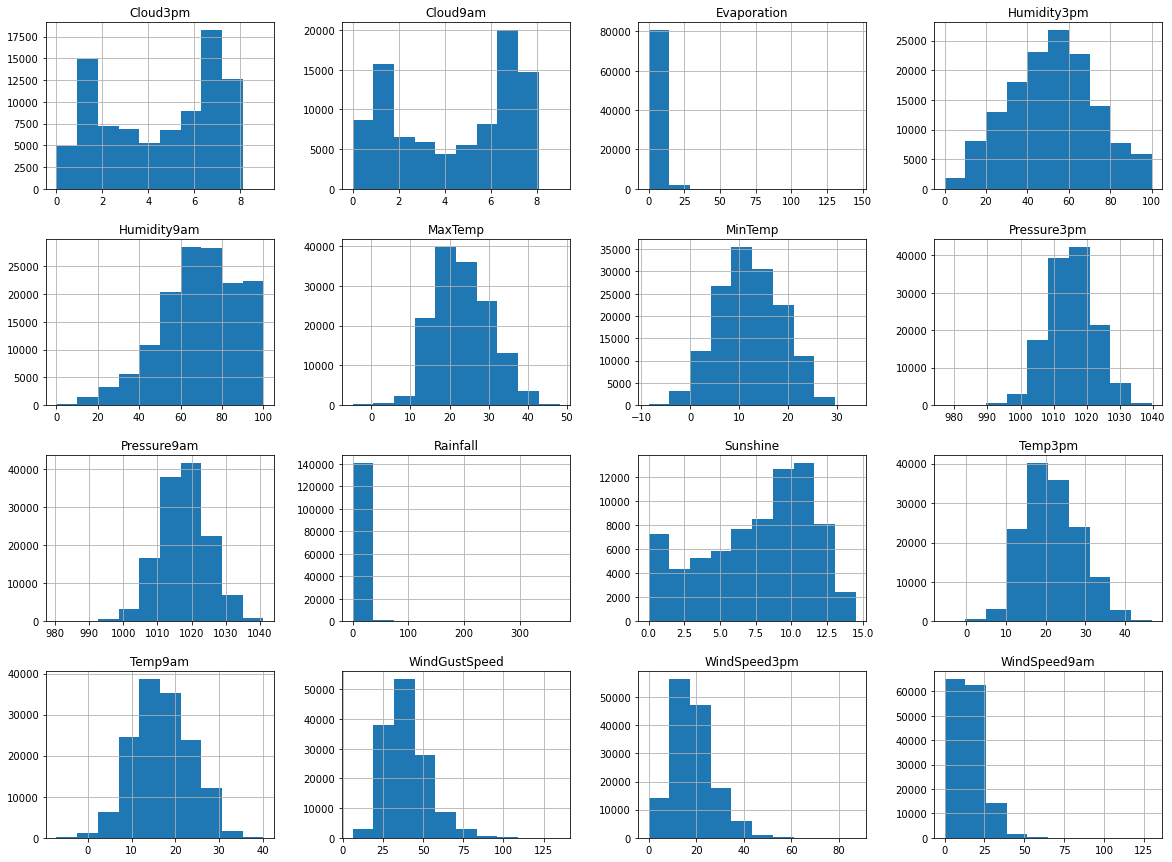

In [15]:
df00.hist(figsize=(20,15))

* We can notice that the only sagnificant difference is between Humidity 9am and Humidity 3pm,       
  the humidity at 9am was higher and then it was lower on 3pm.
* Also the wind speed increased from the time between 9am to 3pm.

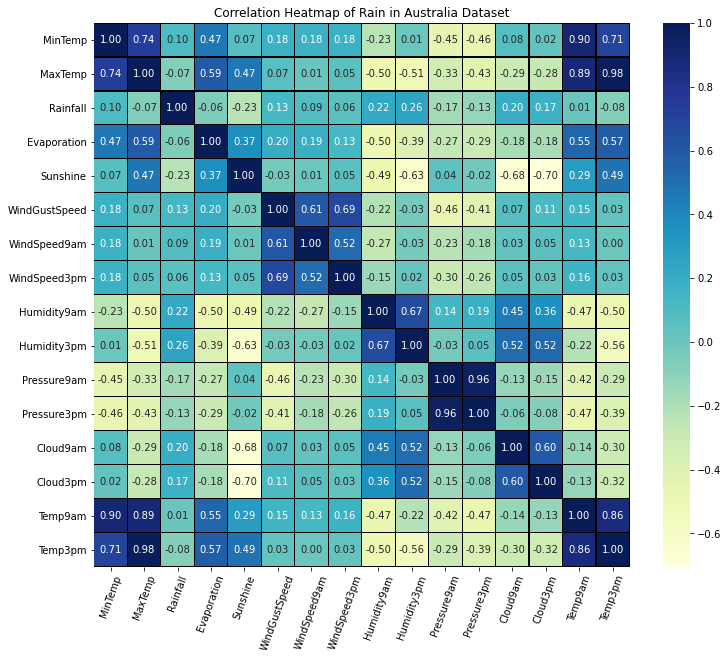

In [16]:
plt.figure(figsize=(12,10))
plt.title('Correlation Heatmap of Rain in Australia Dataset')
ax = sns.heatmap(df00.corr(), square=False, annot=True, fmt='.2f', linecolor='black',linewidths=.2,cmap="YlGnBu")
ax.set_xticklabels(ax.get_xticklabels(), rotation=70)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)           
plt.show()

* Temp9am and MinTemp are highly correlated with correlation of 0.9 .
* Temp9am and MaxTemp are highly correlated with correlation of 0.89 .
* Temp3pm and MaxTemp have almost perfect correlation of 0.98 .
* Pressure3Pm and Pressure9am are highly correlated with correlation of 0.96 .
* Temp9am and Temp3pm have high correlation of 0.86 .

# Prepare the data

In [17]:
df00["Date"] = pd.to_datetime(df00["Date"])

In [18]:
# I will split the Date to day, month,year and then i will convert it to season in order to get better prediction.
df00["Year"] = df00["Date"].dt.year
df00["Month"] = df00["Date"].dt.month
df00["Day"] = df00["Date"].dt.day
df01=df00.copy()

### These four rows will fill true or false in the seasons columns correspondingly to Australia.

In [19]:
df01["Summer"]=((df01["Month"]==12)|(df01["Month"]==1)|(df01["Month"]==2))
df01["Autumn"]=((df01["Month"]==3)|(df01["Month"]==4)|(df01["Month"]==5))
df01["Winter"]=((df01["Month"]==6)|(df01["Month"]==7)|(df01["Month"]==8))
df01["Spring"]=((df01["Month"]==9)|(df01["Month"]==10)|(df01["Month"]==11))


In [20]:
##This function will convert True to 1 and False to 0
encoder=LabelEncoder()
Labael_Encoder_Columns=["Summer","Autumn","Winter","Spring"]
for column in Labael_Encoder_Columns:
    df01[column]=encoder.fit_transform(df01[column])

In [21]:
df01.drop(["Date","Day","Month","Year"],axis=1,inplace=True)
df01.shape

(145460, 26)

In [22]:
# dropping null values of today and tomorrow variables which is just 2.2%
df02= df01[df01['RainTomorrow'].notnull()]
df02= df02[df02['RainToday'].notnull()]

In [23]:
df02.isnull().sum()

Location             0
MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustDir       9163
WindGustSpeed     9105
WindDir9am        9660
WindDir3pm        3670
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
RainToday            0
RainTomorrow         0
Summer               0
Autumn               0
Winter               0
Spring               0
dtype: int64

In [24]:
df03=df02.copy()

### Now i will convert the categorial values to numerical values.

###### The next function will add pre name to the given columns.

In [25]:
def column_pre_name(data,column,pre_name):
    return data[column].apply(lambda x:pre_name+str(x))

In [26]:
df03['WindDir9am']=column_pre_name(df03,'WindDir9am',"9_")
df03['WindDir3pm']=column_pre_name(df03,'WindDir3pm',"3_")

In [27]:
df03['WindDir9am'].head()

0      9_W
1    9_NNW
2      9_W
3     9_SE
4    9_ENE
Name: WindDir9am, dtype: object

In [28]:
df04=df03.copy()

###### This function will fill the given columns with dummies correspondingly, and     will remove the old ones.

In [29]:
def onehot_encoder(data,columns):
    for column in columns:
        dummies=pd.get_dummies(data[column])
        data=pd.concat([data,dummies],axis=1)
        data.drop(column,axis=1,inplace=True)
    return data

In [30]:
features=['Location','WindGustDir','WindDir9am','WindDir3pm']
df04=onehot_encoder(df04, features)

In [31]:
df04.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Summer,Autumn,Winter,Spring,Adelaide,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,MelbourneAirport,Mildura,Moree,MountGambier,MountGinini,Newcastle,Nhil,NorahHead,NorfolkIsland,Nuriootpa,PearceRAAF,Penrith,Perth,PerthAirport,Portland,Richmond,Sale,SalmonGums,Sydney,SydneyAirport,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,9_E,9_ENE,9_ESE,9_N,9_NE,9_NNE,9_NNW,9_NW,9_S,9_SE,9_SSE,9_SSW,9_SW,9_W,9_WNW,9_WSW,9_nan,3_E,3_ENE,3_ESE,3_N,3_NE,3_NNE,3_NNW,3_NW,3_S,3_SE,3_SSE,3_SSW,3_SW,3_W,3_WNW,3_WSW,3_nan
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


### After handling the categorial values i will handle the null values

In [32]:
df04.isnull().sum()

MinTemp          468
MaxTemp          307
Rainfall           0
Evaporation    59694
Sunshine       66805
               ...  
3_SW               0
3_W                0
3_WNW              0
3_WSW              0
3_nan              0
Length: 121, dtype: int64

###### This function will fill the null values with the mean values.

In [33]:
def fill_with_mean(data, columns):
    for column in columns:
        data[column]=data[column].fillna(data[column].mean())

In [34]:
df05=df04.copy()

In [35]:
mean_cols=['MinTemp',
           'MaxTemp',
           'Rainfall',
           'Evaporation',
           'Sunshine',
           'WindGustSpeed',
           'WindSpeed9am',
           'WindSpeed3pm',
           'Humidity9am',
           'Humidity3pm',
           'Pressure9am',
           'Pressure3pm',
           'Cloud9am',
           'Cloud3pm',
           'Temp9am',
           'Temp3pm']
fill_with_mean(df05,mean_cols)

In [36]:
df05.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Summer,Autumn,Winter,Spring,Adelaide,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,MelbourneAirport,Mildura,Moree,MountGambier,MountGinini,Newcastle,Nhil,NorahHead,NorfolkIsland,Nuriootpa,PearceRAAF,Penrith,Perth,PerthAirport,Portland,Richmond,Sale,SalmonGums,Sydney,SydneyAirport,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,9_E,9_ENE,9_ESE,9_N,9_NE,9_NNE,9_NNW,9_NW,9_S,9_SE,9_SSE,9_SSW,9_SW,9_W,9_WNW,9_WSW,9_nan,3_E,3_ENE,3_ESE,3_N,3_NE,3_NNE,3_NNW,3_NW,3_S,3_SE,3_SSE,3_SSW,3_SW,3_W,3_WNW,3_WSW,3_nan
0,13.4,22.9,0.6,5.472516,7.63054,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.49925,16.9,21.8,No,No,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,7.4,25.1,0.0,5.472516,7.63054,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.431161,4.49925,17.2,24.3,No,No,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,12.9,25.7,0.0,5.472516,7.63054,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.431161,2.00000,21.0,23.2,No,No,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,9.2,28.0,0.0,5.472516,7.63054,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.431161,4.49925,18.1,26.5,No,No,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,5.472516,7.63054,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [37]:
df05.isnull().sum().sum()

0

##### After both functions we finally got 0 null values.

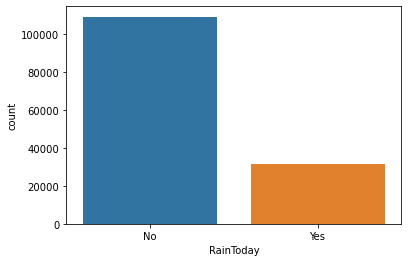

In [38]:
sns.countplot(df05['RainToday'])

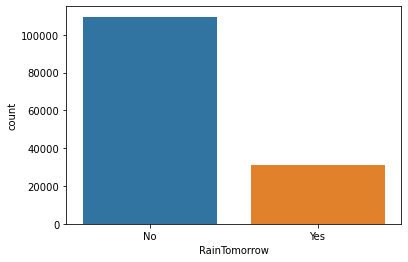

In [39]:
sns.countplot(df05['RainTomorrow'])

In [40]:
df05['RainTomorrow'].value_counts()

No     109586
Yes     31201
Name: RainTomorrow, dtype: int64

In [41]:
df06=df05.copy()

In [42]:
# We will want to work with 0 for No and 1 for Yes 
encoder=LabelEncoder()
Labael_Encoder_Columns=['RainToday','RainTomorrow']
for column in Labael_Encoder_Columns:
    df06[column]=encoder.fit_transform(df06[column])

In [43]:
df06.groupby(by=["Winter","RainTomorrow"]).describe()

MinTemp                                              \
                       count       mean       std  min   25%   50%   75%   
Winter RainTomorrow                                                        
0      0             83214.0  13.412601  5.906185 -6.9   9.3  13.4  17.6   
       1             22007.0  15.213223  5.892754 -6.3  10.9  15.3  19.6   
1      0             26372.0   7.117429  5.419147 -8.5   3.4   6.8  10.3   
       1              9194.0   8.358754  4.350956 -7.2   5.7   8.4  11.1   

                           MaxTemp                                        \
                      max    count       mean       std  min   25%   50%   
Winter RainTomorrow                                                        
0      0             33.9  83214.0  25.652632  6.529809 -1.5  20.9  25.2   
       1             30.7  22007.0  23.404045  6.478245 -3.1  18.7  22.9   
1      0             26.6  26372.0  18.116619  5.367422 -4.8  14.6  17.5   
       1             23.3   9194.0  15.631981  4.297684 -4.1  13.1  15.5   

                                Rainfall                                      \
                      75%   max    count      mean        std  min  25%  50%   
Winter RainTomorrow                                                            
0      0             30.2  48.1  83214.0  1.277587   5.503417  0.0  0.0  0.0   
       1             28.1  46.8  22007.0  6.424778  15.629171  0.0  0.0  0.6   
1      0             20.6  37.5  26372.0  1.247266   4.751691  0.0  0.0  0.0   
       1             18.3  35.6   9194.0  5.465488  10.507753  0.0  0.0  1.2   

                                  Evaporation                                \
                       75%    max       count      mean       std  min  25%   
Winter RainTomorrow                                                           
0      0             0.200  240.0     83214.0  6.108582  3.443462  0.0  5.4   
       1             6.000  371.0     22007.0  5.436967  2.716799  0.0  4.4   
1      0             0.200  219.6     26372.0  4.099643  2.176400  0.0  2.2   
       1             6.475  192.0      9194.0  3.738566  2.033020  0.0  1.8   

                                               Sunshine                      \
                          50%       75%    max    count      mean       std   
Winter RainTomorrow                                                           
0      0             5.472516  6.600000  145.0  83214.0  8.338184  2.521770   
       1             5.472516  5.472516   74.8  22007.0  6.079366  2.949834   
1      0             5.472516  5.472516   55.0  26372.0  7.396255  2.235838   
       1             4.200000  5.472516   30.8   9194.0  5.610675  2.797908   

                                                           WindGustSpeed  \
                     min      25%      50%       75%   max         count   
Winter RainTomorrow                                                        
0      0             0.0  7.63054  7.63054  10.10000  14.5       83214.0   
       1             0.0  4.20000  7.63054   7.63054  13.9       22007.0   
1      0             0.0  7.63054  7.63054   8.20000  11.7       26372.0   
       1             0.0  3.40000  7.63054   7.63054  10.9        9194.0   

                                                                         \
                          mean        std  min   25%   50%   75%    max   
Winter RainTomorrow                                                       
0      0             39.344364  11.551585  7.0  31.0  39.0  44.0  126.0   
       1             45.600137  14.731785  7.0  35.0  43.0  54.0  135.0   
1      0             35.377809  12.944840  6.0  26.0  35.0  41.0  120.0   
       1             45.336291  16.251435  7.0  35.0  43.0  56.0  111.0   

                    WindSpeed9am                                             \
                           count       mean       std  min  25%   50%   75%   
Winter RainTomorrow                                                  

In [44]:
df06.groupby(by=["Spring","RainTomorrow"]).describe()

MinTemp                                                   \
                       count       mean       std  min  25%   50%   75%   max   
Spring RainTomorrow                                                             
0      0             82492.0  12.004304  6.565919 -8.5  7.2  12.0  16.9  33.9   
       1             24011.0  13.396809  6.539950 -7.2  8.4  12.9  18.6  30.7   
1      0             27094.0  11.572966  5.797647 -6.8  7.5  11.3  15.3  30.3   
       1              7190.0  12.514186  5.425541 -6.3  8.8  12.2  16.0  28.6   

                     MaxTemp                                              \
                       count       mean       std  min   25%   50%   75%   
Spring RainTomorrow                                                        
0      0             82492.0  23.739148  7.241306 -4.8  18.3  23.3  28.9   
       1             24011.0  21.109568  7.074857 -4.1  15.8  20.3  26.0   
1      0             27094.0  24.143348  6.418648 -1.5  19.4  23.4  28.7   
       1              7190.0  21.128152  6.277104 -2.5  16.7  20.2  25.0   

                          Rainfall                                           \
                      max    count      mean        std  min  25%  50%  75%   
Spring RainTomorrow                                                           
0      0             48.1  82492.0  1.281919   5.523381  0.0  0.0  0.0  0.2   
       1             46.8  24011.0  6.637520  15.129560  0.0  0.0  1.0  6.6   
1      0             45.5  27094.0  1.234882   4.702423  0.0  0.0  0.0  0.2   
       1             44.9   7190.0  4.487663  11.031586  0.0  0.0  0.4  4.4   

                           Evaporation                                \
                       max       count      mean       std  min  25%   
Spring RainTomorrow                                                    
0      0             240.0     82492.0  5.480972  3.276935  0.0  4.0   
       1             367.6     24011.0  4.789655  2.662220  0.0  3.0   
1      0             159.8     27094.0  6.064036  3.325817  0.0  5.2   
       1             371.0      7190.0  5.426885  2.549078  0.0  4.4   

                                               Sunshine                      \
                          50%       75%    max    count      mean       std   
Spring RainTomorrow                                                           
0      0             5.472516  5.472516  145.0  82492.0  8.006595  2.501307   
       1             5.472516  5.472516   74.8  24011.0  5.829917  2.929955   
1      0             5.472516  6.400000   86.2  27094.0  8.430930  2.422483   
       1             5.472516  5.472516   55.4   7190.0  6.313073  2.827318   

                                                           WindGustSpeed  \
                     min      25%      50%       75%   max         count   
Spring RainTomorrow                                                        
0      0             0.0  7.63054  7.63054   9.30000  14.5       82492.0   
       1             0.0  3.70000  7.63054   7.63054  13.9       24011.0   
1      0             0.0  7.63054  7.63054  10.30000  14.2       27094.0   
       1             0.0  4.80000  7.63054   7.63054  13.3        7190.0   

                                                                          \
                          mean        std   min   25%   50%   75%    max   
Spring RainTomorrow                                                        
0      0             37.584148  11.913640   6.0  30.0  37.0  44.0  124.0   
       1             44.818159  15.112418   7.0  35.0  43.0  54.0  135.0   
1      0             40.842768  12.017817  11.0  33.0  39.0  46.0  126.0   
       1             47.874166  15.237109  13.0  37.0  44.0  57.0  124.0   

                    WindSpeed9am                                            \
                           count       mean       std  min  25%        50%   
Spring RainTomorrow                                                          
0      

In [45]:
df06.groupby(by=["Summer","RainTomorrow"]).describe()

MinTemp                                              \
                       count       mean       std  min   25%   50%   75%   
Summer RainTomorrow                                                        
0      0             82497.0  10.412843  6.113133 -8.5   6.1  10.1  14.5   
       1             24379.0  11.565340  5.698926 -7.2   7.7  11.2  15.2   
1      0             27089.0  16.419533  4.906359 -3.0  13.0  16.5  19.9   
       1              6822.0  19.011486  4.775766 -1.3  16.1  19.6  22.7   

                           MaxTemp                                        \
                      max    count       mean       std  min   25%   50%   
Summer RainTomorrow                                                        
0      0             30.3  82497.0  22.133332  6.514931 -4.8  17.4  21.4   
       1             29.1  24379.0  19.368053  6.158123 -4.1  15.1  18.6   
1      0             33.9  27089.0  29.033782  5.991989  7.6  24.5  28.7   
       1             30.7   6822.0  27.352606  5.688834  3.8  23.3  27.4   

                                  Rainfall                                 \
                        75%   max    count      mean        std  min  25%   
Summer RainTomorrow                                                         
0      0             26.500  45.5  82497.0  1.249146   5.102020  0.0  0.0   
       1             23.000  44.9  24379.0  5.473908  12.082768  0.0  0.0   
1      0             33.200  48.1  27089.0  1.334682   5.978493  0.0  0.0   
       1             31.375  46.8   6822.0  8.529962  20.215860  0.0  0.0   

                                     Evaporation                           \
                     50%  75%    max       count      mean       std  min   
Summer RainTomorrow                                                         
0      0             0.0  0.2  240.0     82497.0  5.103339  2.840868  0.0   
       1             0.8  6.0  371.0     24379.0  4.554035  2.349945  0.0   
1      0             0.0  0.0  172.2     27089.0  7.214188  4.010905  0.0   
       1             0.6  7.8  367.6      6822.0  6.303268  3.161977  0.0   

                                                         Sunshine            \
                          25%       50%       75%    max    count      mean   
Summer RainTomorrow                                                           
0      0             3.600000  5.472516  5.472516   86.2  82497.0  7.859747   
       1             2.800000  5.472516  5.472516   55.6  24379.0  5.883119   
1      0             5.472516  5.472516  8.000000  145.0  27089.0  8.878219   
       1             5.472516  5.472516  6.800000   74.8   6822.0  6.149018   

                                                                      \
                          std  min      25%      50%       75%   max   
Summer RainTomorrow                                                    
0      0             2.347272  0.0  7.63054  7.63054   9.20000  14.2   
       1             2.844093  0.0  3.90000  7.63054   7.63054  13.3   
1      0             2.738163  0.0  7.63054  7.63054  11.40000  14.5   
       1             3.141312  0.0  4.10000  7.63054   7.63054  13.9   

                    WindGustSpeed                                              \
                            count       mean        std   min   25%       50%   
Summer RainTomorrow                                                             
0      0                  82497.0  37.296336  12.286213   6.0  30.0  37.00000   
       1                  24379.0  45.519648  15.507008   7.0  35.0  43.00000   
1      0                  27089.0  41.719875  10.499214   7.0  35.0  39.97052   
       1                   6822.0  45.532188  14.027417  13.0  35.0  43.00000   

                                 WindSpeed9am                                 \
                      75%    max        count       mean       std  min  25%   
Summer RainTomorrow                                                            
0      0

In [46]:
df06.groupby(by=["Autumn","RainTomorrow"]).describe()

MinTemp                                              \
                       count       mean       std  min   25%   50%   75%   
Autumn RainTomorrow                                                        
0      0             80555.0  11.744119  6.586558 -8.5   7.0  11.6  16.6   
       1             23206.0  12.777891  6.519682 -7.2   8.0  12.1  17.7   
1      0             29031.0  12.323707  5.777286 -6.9   8.3  12.2  16.4   
       1              7995.0  14.399505  5.489149 -5.5  10.6  14.4  18.3   

                           MaxTemp                                        \
                      max    count       mean       std  min   25%   50%   
Autumn RainTomorrow                                                        
0      0             33.9  80555.0  23.814877  7.428807 -4.8  18.1  23.2   
       1             30.7  23206.0  20.780459  7.230141 -4.1  15.4  19.5   
1      0             29.6  29031.0  23.906244  5.867269  0.0  19.8  23.6   
       1             29.1   7995.0  22.081540  5.724298 -3.1  18.1  21.8   

                                Rainfall                                      \
                      75%   max    count      mean        std  min  25%  50%   
Autumn RainTomorrow                                                            
0      0             29.2  48.1  80555.0  1.272497   5.181693  0.0  0.0  0.0   
       1             25.8  46.8  23206.0  6.063406  14.292410  0.0  0.0  0.8   
1      0             27.9  43.0  29031.0  1.264166   5.729246  0.0  0.0  0.0   
       1             25.7  40.3   7995.0  6.370532  14.391613  0.0  0.0  0.8   

                                Evaporation                                \
                     75%    max       count      mean       std  min  25%   
Autumn RainTomorrow                                                         
0      0             0.2  219.6     80555.0  5.807708  3.510420  0.0  4.6   
       1             6.2  371.0     23206.0  5.015624  2.788434  0.0  3.4   
1      0             0.2  240.0     29031.0  5.118509  2.555731  0.0  4.0   
       1             6.2  175.2      7995.0  4.706834  2.184106  0.0  3.4   

                                               Sunshine                      \
                          50%       75%    max    count      mean       std   
Autumn RainTomorrow                                                           
0      0             5.472516  6.000000  145.0  80555.0  8.242614  2.552208   
       1             5.472516  5.472516   74.8  23206.0  5.986561  2.928337   
1      0             5.472516  5.472516   65.4  29031.0  7.747715  2.264290   
       1             5.472516  5.472516   55.6   7995.0  5.809757  2.866893   

                                                          WindGustSpeed  \
                     min      25%      50%      75%   max         count   
Autumn RainTomorrow                                                       
0      0             0.0  7.63054  7.63054  9.80000  14.5       80555.0   
       1             0.0  4.00000  7.63054  7.63054  13.9       23206.0   
1      0             0.0  7.63054  7.63054  9.00000  12.7       29031.0   
       1             0.0  3.70000  7.63054  7.63054  11.9        7995.0   

                                                                         \
                          mean        std  min   25%   50%   75%    max   
Autumn RainTomorrow                                                       
0      0             39.348609  12.178059  6.0  31.0  39.0  46.0  126.0   
       1             46.180199  15.352251  7.0  35.0  43.0  56.0  135.0   
1      0             35.729334  11.154184  7.0  28.0  35.0  41.0  109.0   
       1             43.613055  14.565075  7.0  33.0  41.0  52.0  135.0   

                    WindSpeed9am                                             \
                           count       mean       std  min  25%   50%   75%   
Autumn RainTomorrow                                                           
0      0   

* We can see that there was more rain in the winter more than any other season, but the difference between all the seasons is not that big as i excepted.
* It is clear to see that in the spring and in the summer the difference in rain tomorrow is not big at all.
* So we can conclude that the season is not that effective on the rain tommorow.

In [47]:
df07=df06.copy()

In [48]:
y=df07["RainTomorrow"]

In [49]:
X=df07.drop("RainTomorrow",axis=1)

## Model training

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size=0.2, random_state=0)

In [72]:
## Standardize our data with MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train=pd.DataFrame(scaler.transform(X_train),columns=X.columns)
X_test=pd.DataFrame(scaler.transform(X_test),columns=X.columns)

In [73]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_curve, auc, roc_auc_score
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train,y_train)

DummyClassifier(strategy='most_frequent')

In [74]:
y_pred=dummy_clf.predict(X_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87     21813
           1       1.00      0.00      0.00      6345

    accuracy                           0.77     28158
   macro avg       0.89      0.50      0.44     28158
weighted avg       0.83      0.77      0.68     28158

Accuracy: 0.7746643937779671


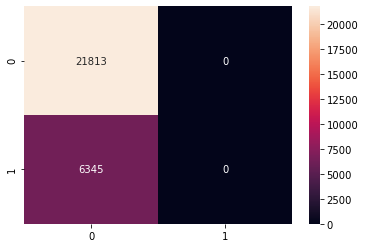

In [75]:
confMatrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confMatrix, annot=True, fmt="d")
result1 = classification_report(y_test, y_pred,zero_division=1)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

* I want to get better results then the dummy classifier.
* Because the recall of the dummy is 1 at no rain tomorrow and the precision is also 1 at is raining tomorrow, i want to get better results at all of the other categories.

#### I will start with KNN modle and will check different amount of neighbors, in order to get the best score.

In [76]:
from sklearn.neighbors import KNeighborsClassifier
k_range = list(range(1, 26))
acc = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc.append(accuracy_score(y_test, y_pred))
acc

[0.7597130478016905,
 0.7895091980964557,
 0.7900774202713261,
 0.799524113928546,
 0.7997371972441224,
 0.8026138220044037,
 0.8063782939129199,
 0.8047091412742382,
 0.8095745436465658,
 0.8070530577455786,
 0.809858654734001,
 0.8057390439661908,
 0.8089352936998366,
 0.8065558633425669,
 0.8086866964983308,
 0.8065203494566375,
 0.8090418353576249,
 0.8063427800269906,
 0.8084025854108957,
 0.806200724483273,
 0.8083315576390369,
 0.8055614745365438,
 0.8075857660345195,
 0.8047091412742382,
 0.8073726827189431]

Text(0, 0.5, 'Testing Accuracy')

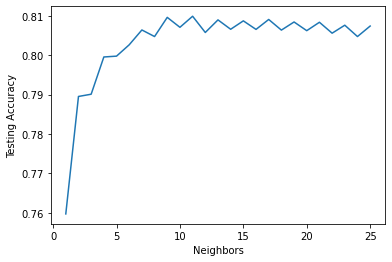

In [77]:
plt.plot(k_range, acc)
plt.xlabel('Neighbors')
plt.ylabel('Testing Accuracy')

* We can see that there isn't sagnificant difference between k=3-25, it is almost the same accuracy.
* If we look more closley it seems like k=11 has the best accuracy with 80.98%.

In [78]:
# Choose the best k that i found.
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=11)

In [79]:
# Training the model with k=11.
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [80]:
y_pred = classifier.predict(X_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89     21813
           1       0.67      0.30      0.42      6345

    accuracy                           0.81     28158
   macro avg       0.75      0.63      0.65     28158
weighted avg       0.79      0.81      0.78     28158

Accuracy: 0.809858654734001


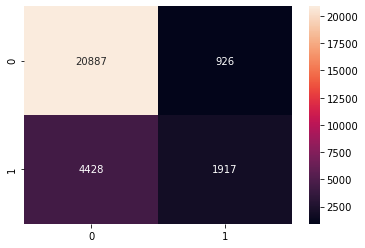

In [81]:
confMatrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confMatrix, annot=True, fmt="d")
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

### Random Forest Classifier

In [82]:
rf = RandomForestClassifier(random_state=10)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

In [83]:
y_pred = rf.predict(X_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     21813
           1       0.78      0.50      0.61      6345

    accuracy                           0.85     28158
   macro avg       0.82      0.73      0.76     28158
weighted avg       0.85      0.85      0.84     28158

Accuracy: 0.8544996093472548


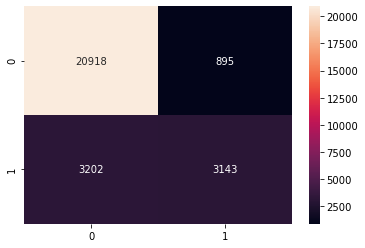

In [84]:
confMatrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confMatrix, annot=True, fmt="d")
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

## Conclusions:
* We got in both of the modles better results then the dummy classifier results!
* We got the best results with the random forest classifier.
* Between all the k's we got the best result with k=11.
* The recall was 1 because the less of samples that actucaly was 1.
* Given that the recall was almost 0.3 the accuracy was really good.
* The modle could be better with more 1 samples.
* The random forests gave us the best accuracy score, better than the knn.